# Backtesting with [BT](https://pmorissette.github.io/bt/#what-is-bt)

In [159]:
import bt

In [132]:
# Get prices from Yahoo Finance
data = bt.get('spy,agg,qqq', start='2010-01-01')
data.head()

,spy,agg,qqq
Date,,,
2010-01-04,89.610825,75.210091,41.320522
2010-01-05,89.848030,75.552299,41.320522
2010-01-06,89.911293,75.508583,41.071297
2010-01-07,90.290848,75.421219,41.098000
2010-01-08,90.591324,75.464890,41.436222


In [133]:
# Create the BT strategy with Quarterly rebalancing and specified asset weights
# For the list of available strategies see BT documentation)
fixed_weights = bt.Strategy('fixed_weights', [bt.algos.RunQuarterly(),
                       bt.algos.RunAfterDate('2010-01-04'),
                       bt.algos.SelectAll(),
                       bt.algos.WeighSpecified(spy=0.6,agg=0.3,qqq=0.10),
                       bt.algos.Rebalance()])

In [134]:
# Create the BT strategy with Quarterly rebalancing and Markowitz Mean-Var optimization
mean_var = bt.Strategy('mean_var', [bt.algos.RunQuarterly(),
                       bt.algos.RunAfterDate('2010-01-04'),
                       bt.algos.SelectAll(),
                       bt.algos.WeighMeanVar(rf=0.01,bounds=(0.1,0.6)), # set risk-free rate and min,max bounds for each security 
                       bt.algos.Rebalance()])

In [135]:
# Create a backtest and run it
test = bt.Backtest(fixed_weights, data)
test2 = bt.Backtest(mean_var, data)
res = bt.run(test,test2)

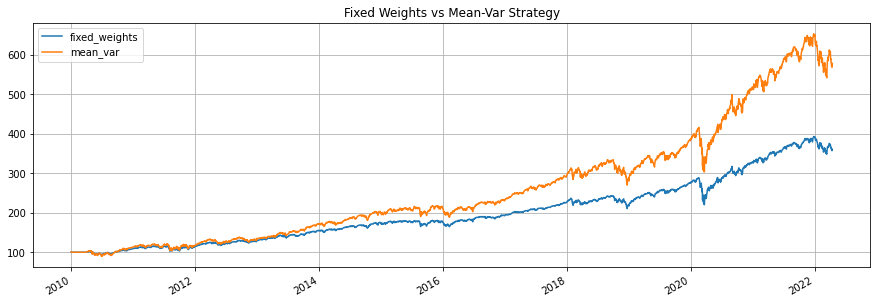

In [158]:
# Plot strategy performance over time 
res.plot(grid=True, title='Fixed Weights vs Mean-Var Strategy')
plt.

In [137]:
# Display lookback returns
res.display_lookback_returns()

,fixed_weights,mean_var
mtd,-3.34%,-5.19%
3m,-6.46%,-8.84%
6m,-3.55%,-5.43%
ytd,-8.53%,-12.02%
1y,2.48%,2.25%
3y,12.97%,19.01%
5y,12.15%,17.94%
10y,11.32%,16.04%
incep,10.93%,15.21%


In [138]:
# Display monthly returns from backtest - fixed weights 
res.display_monthly_returns(backtest='fixed_weights')

  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec    YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
  2010   0      0      0      1.04  -5.18  -3.03   5.1   -2.9    6.7    2.98  -0.26   4.34   8.4
  2011   1.68   2.5   -0.1    2.5   -0.43  -1.34  -0.52  -3.28  -4.19   7.87  -0.62   0.96   4.59
  2012   3.88   3.27   2.33  -0.22  -3.95   2.71   1.22   2.02   1.7   -1.63   0.55   0.41  12.7
  2013   3.13   0.98   2.64   1.69   1.19  -1.51   3.81  -2.1    2.74   3.53   2.08   1.72  21.59
  2014  -1.87   3.32   0.17   0.64   2.19   1.53  -0.76   3.21  -1.09   2.01   2.32  -0.34  11.75
  2015  -1.38   3.76  -1.08   0.69   0.87  -1.8    2.07  -4.45  -1.47   6.25   0.18  -1.28   1.96
  2016  -3.35   0.07   4.9   -0      1.45   0.56   3.06   0.12   0.25  -1.43   1.47   1.43   8.62
  2017   1.66   3      0.27   1.14   1.45   0.14   1.74   0.67   1      1.9    2      0.94  17.07
  2018   3.92  -2.64  

In [139]:
# Display monthly returns from backtest - mean-var
res.display_monthly_returns(backtest='mean_var')

  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec     YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  ------
  2010   0      0      0      1.7   -6.71  -4.91   6.5   -4.33  10.59   4.96  -0.18   4.81   11.62
  2011   2.4    2.97  -0.29   2.75  -0.95  -1.76   0.57  -4.52  -4.63   9.62  -1.78   0.08    3.73
  2012   5.49   4.55   3.44  -0.89  -5.9    3.35   1.09   3.86   1.32  -3.72   0.97  -0.03   13.69
  2013   3.06   0.65   2.97   2.2    2.67  -2      5.37  -1.22   3.99   4.45   3      2.5    31.1
  2014  -2.07   4.48  -1.42   0.1    3.49   2.49   0.28   4.31  -0.93   2.4    3.63  -1.42   16.1
  2015  -1.94   5.91  -1.86   1.42   1.7   -2.21   3.5   -5.97  -1.99   9.37   0.44  -1.51    6.09
  2016  -5.54  -0.86   6.17  -1.77   3.1   -1.06   5.43   0.65   1.36  -1.48   1.11   1.32    8.16
  2017   3.64   3.88   1.27   2.02   2.84  -1.23   3.09   1.44   0.35   3.48   2.09   0.77   26.23
  2018   6.8

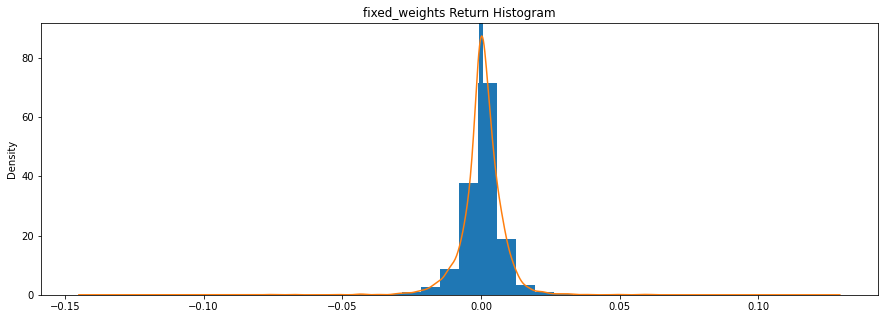

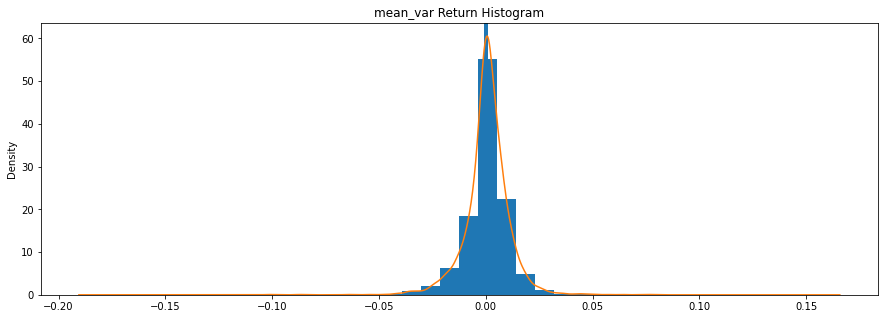

In [140]:
# Display strategy histogram
res.plot_histogram('fixed_weights')
res.plot_histogram('mean_var')

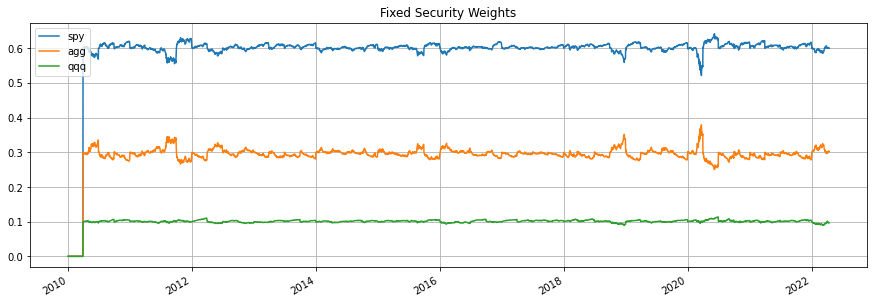

In [141]:
# Plot the security weights over time - fixed weights
res.plot_security_weights(grid=True, title='Fixed Security Weights')

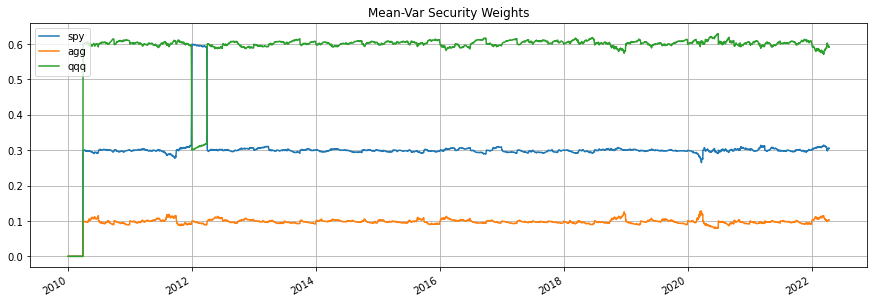

In [142]:
# Plot the security weights over time - Mean-Var optimization
res2 = bt.run(test2)
res2.plot_security_weights(grid=True, title='Mean-Var Security Weights')

In [143]:
# Security weights over time - fixed weights
res.get_security_weights().tail()

,spy,agg,qqq
2022-04-08,0.602620,0.299164,0.097990
2022-04-11,0.600672,0.302078,0.097021
2022-04-12,0.599453,0.303544,0.096774
2022-04-13,0.600647,0.301308,0.097817
2022-04-14,0.600469,0.302544,0.096757


In [144]:
# Security weights over time - mean-var
res2.get_security_weights().tail()

,spy,agg,qqq
2022-04-08,0.304501,0.100766,0.594663
2022-04-11,0.305313,0.102350,0.592266
2022-04-12,0.305192,0.103015,0.591722
2022-04-13,0.303907,0.101623,0.594400
2022-04-14,0.305686,0.102667,0.591574


In [145]:
# Print strategy stats (set risk-free rate)
res.set_riskfree_rate(0.01)
res.display()

Stat                 fixed_weights    mean_var
-------------------  ---------------  ----------
Start                2010-01-03       2010-01-03
End                  2022-04-14       2022-04-14
Risk-free rate       1.00%            1.00%

Total Return         257.47%          468.42%
Daily Sharpe         0.86             0.88
Daily Sortino        1.31             1.36
CAGR                 10.93%           15.21%
Max Drawdown         -23.60%          -27.08%
Calmar Ratio         0.46             0.56

MTD                  -3.34%           -5.19%
3m                   -6.46%           -8.84%
6m                   -3.55%           -5.43%
YTD                  -8.53%           -12.02%
1Y                   2.48%            2.25%
3Y (ann.)            12.97%           19.01%
5Y (ann.)            12.15%           17.94%
10Y (ann.)           11.32%           16.04%
Since Incep. (ann.)  10.93%           15.21%

Daily Sharpe         0.86             0.88
Daily Sortino        1.31             1.36
Da